# Stock Price Analysis: BMW vs. Mercedes

This notebook presents an analysis and prediction of stock prices for BMW and Mercedes using historical data. We’ll explore the stock data, create visualizations, and build predictive models to gain insights and make future predictions. The models will help us determine which factors influence stock prices and provide a forecast for both BMW and Mercedes.


## Importing libraries

To start, we import the necessary libraries for data manipulation, visualization, and modeling. These include pandas, matplotlib, and machine learning tools from sklearn.

In [ ]:
!pip install yfinance pandas matplotlib seaborn scikit-learn pycaret sagemaker

^C


Defaulting to user installation because normal site-packages is not writeable
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ------------------------------------- 948.2/948.2 kB 14.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached cloudpickle-2.2.1-py3-none-any.whl.metadata (6.9 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached google_pasta-0.2.0-py3

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import yfinance as yf


# Set plot style
sns.set(style="whitegrid")


## Data collection

We fetch historical stock data for BMW and Mercedes using yfinance. This step ensures we have a comprehensive dataset spanning multiple decades.

In [10]:
# Fetch historical stock data
bmw = yf.download("BMW.DE", start="1970-01-01", end="2024-01-01")
mercedes = yf.download("MBG.DE", start="1970-01-01", end="2024-01-01")


# Save full data and training data to CSV
bmw.to_csv("Datasets/bmw_stock_data.csv")
mercedes.to_csv("Datasets/mercedes_stock_data.csv")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Data loading (Stockprice)

In [11]:
# Load the BMW and Mercedes stock data
# Update paths to match your file locations if needed
bmw = pd.read_csv('Datasets/bmw_stock_data.csv', skiprows=2, names=["Date", "Adj Close", "Close", "High", "Low", "Open", "Volume"])
mercedes = pd.read_csv('Datasets/mercedes_stock_data.csv', skiprows=2, names=["Date", "Adj Close", "Close", "High", "Low", "Open", "Volume"])

## Data Cleaning

After loading the data, we need to ensure that the columns have the correct formats and remove any irregular data points. We’ll convert dates to datetime, set them as indices, and ensure numerical columns are properly formatted.


In [12]:
# Remove rows where 'Date' is invalid or contains non-date values
bmw = bmw[pd.to_datetime(bmw['Date'], errors='coerce').notna()]
mercedes = mercedes[pd.to_datetime(mercedes['Date'], errors='coerce').notna()]

# Convert 'Date' column to datetime format
bmw['Date'] = pd.to_datetime(bmw['Date'])
mercedes['Date'] = pd.to_datetime(mercedes['Date'])

# Set 'Date' as the index
bmw.set_index('Date', inplace=True)
mercedes.set_index('Date', inplace=True)

# Convert price-related columns to numeric data types
for col in ["Adj Close", "Close", "High", "Low", "Open", "Volume"]:
    bmw[col] = pd.to_numeric(bmw[col], errors='coerce')
    mercedes[col] = pd.to_numeric(mercedes[col], errors='coerce')


# Filter the data for training (2000 to 2022)
bmw_train = bmw.loc['2000-01-01':'2020-12-31']
mercedes_train = mercedes.loc['2000-01-01':'2022-12-31']

# Check for missing values
print("BMW missing values:\n", bmw.isnull().sum())
print("Mercedes missing values:\n", mercedes.isnull().sum())

BMW missing values:
 Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Mercedes missing values:
 Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


C:\Users\redwan\AppData\Local\Temp\ipykernel_19580\2522383450.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bmw = bmw[pd.to_datetime(bmw['Date'], errors='coerce').notna()]
C:\Users\redwan\AppData\Local\Temp\ipykernel_19580\2522383450.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mercedes = mercedes[pd.to_datetime(mercedes['Date'], errors='coerce').notna()]


## Handeling outliers

In [ ]:
# Handling outliers: capping at the 5th and 95th percentiles
# bmw['Close'] = bmw['Close'].clip(lower=bmw['Close'].quantile(0.05), upper=bmw['Close'].quantile(0.95))
# mercedes['Close'] = mercedes['Close'].clip(lower=mercedes['Close'].quantile(0.05), upper=mercedes['Close'].quantile(0.95))


## BMW

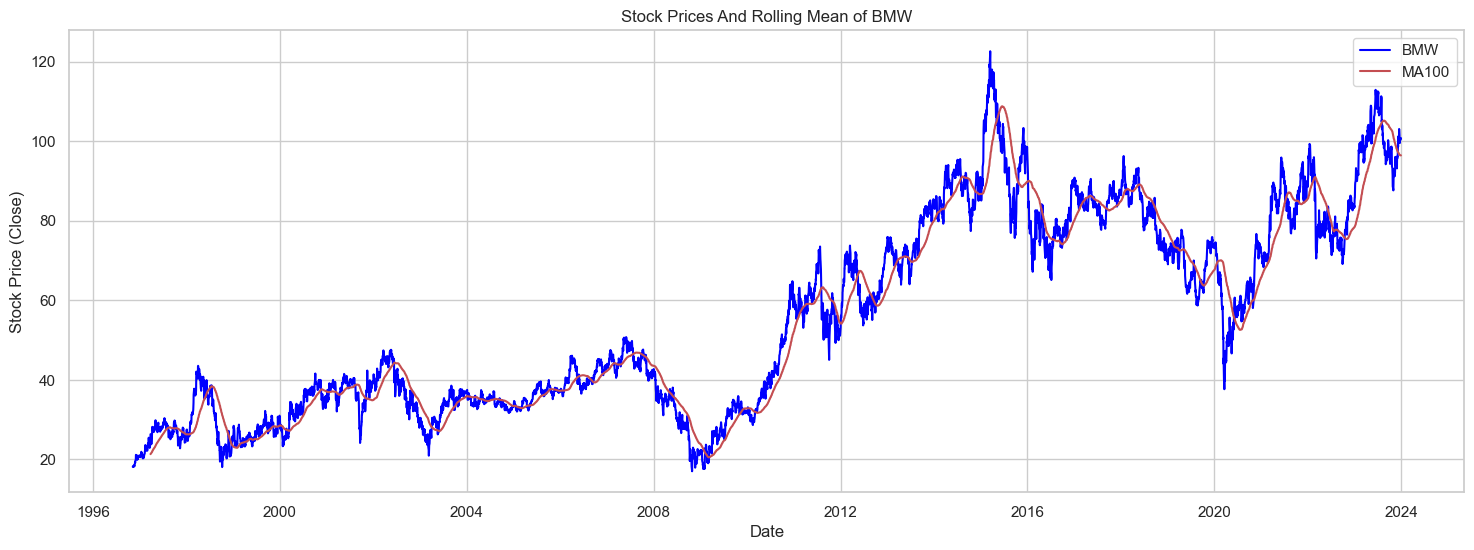

In [13]:
ma100=bmw.Close.rolling(100).mean()

plt.figure(figsize=(18, 6))
plt.plot(bmw['Close'], label='BMW', color='blue')
plt.plot(ma100,'r', label='MA100')
plt.title("Stock Prices And Rolling Mean of BMW")
plt.xlabel("Date")
plt.ylabel("Stock Price (Close)")
plt.legend()
plt.show()

## Mercedes

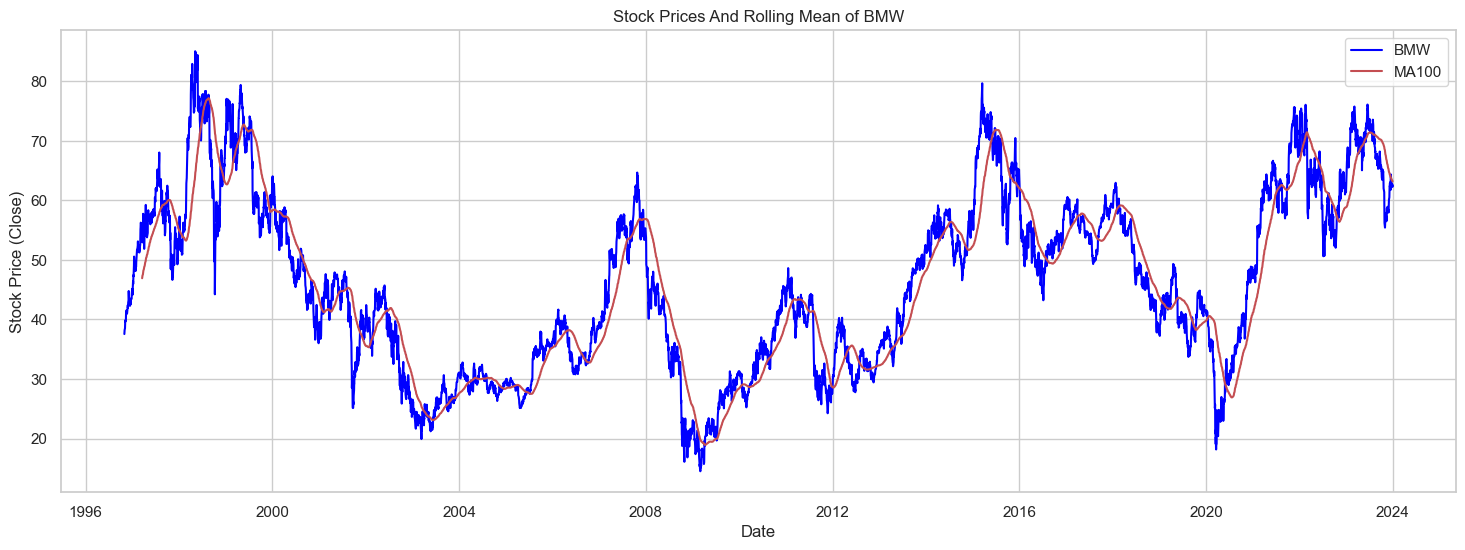

In [14]:
ma100=mercedes.Close.rolling(100).mean()

plt.figure(figsize=(18, 6))
plt.plot(mercedes['Close'], label='BMW', color='blue')
plt.plot(ma100,'r', label='MA100')
plt.title("Stock Prices And Rolling Mean of BMW")
plt.xlabel("Date")
plt.ylabel("Stock Price (Close)")
plt.legend()
plt.show()

## Comparing BMW Vs Mercedes Closing Stockprice
We’ll start by exploring the stock price trends for both BMW and Mercedes. Analyzing the closing prices over time helps us observe any significant fluctuations or trends. The spike of stockprices ramped up in 2015 because of the introduction of new models, including advancements in their electric vehicle lineup, boosted investor confidence and market interest .


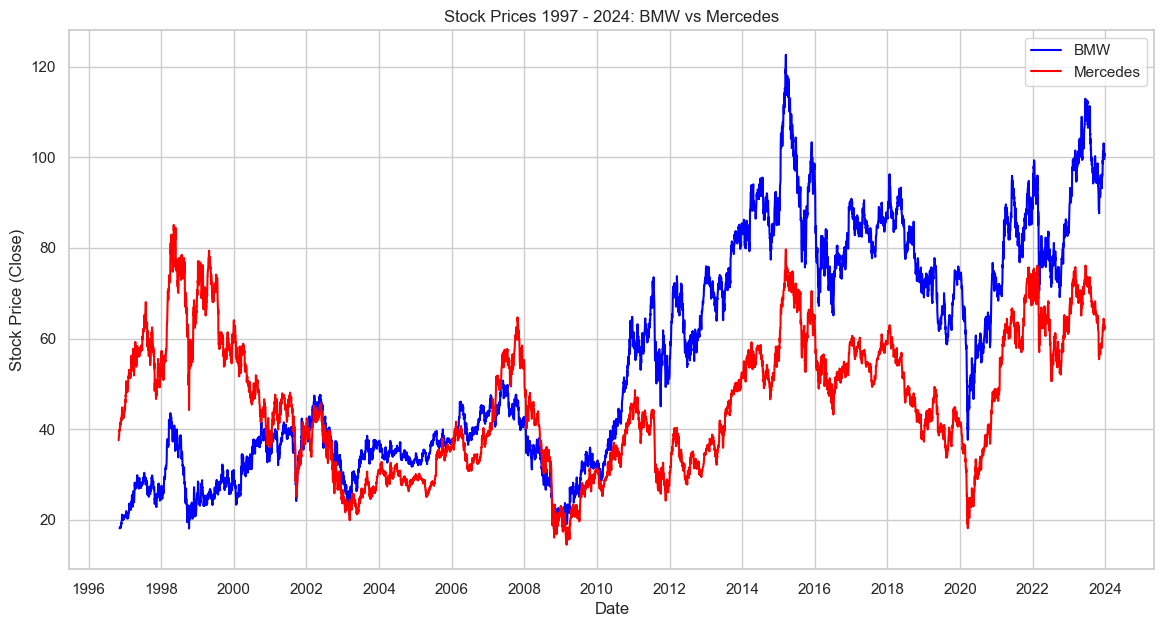

In [48]:
import matplotlib.dates as mdates

# Plot the closing prices of BMW and Mercedes over time
plt.figure(figsize=(14, 7))
plt.plot(bmw['Close'], label='BMW', color='blue')
plt.plot(mercedes['Close'], label='Mercedes', color='red')
plt.title("Stock Prices 1997 - 2024: BMW vs Mercedes")
plt.xlabel("Date")
plt.ylabel("Stock Price (Close)")
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.legend()
plt.show()

## Impact of COVID-19 on Stock Prices

We analyze the price trends during the COVID-19 period (2019-2024) to identify significant changes. Both companies faced unprecedented challenges during the COVID-19 period, but BMW's strategic resilience and market positioning helped it weather the storm slightly better than Mercedes-Benz.


BMW's stock dropped by 49.50% during the COVID-19 period.
Mercedes' stock dropped by 56.30% during the COVID-19 period.


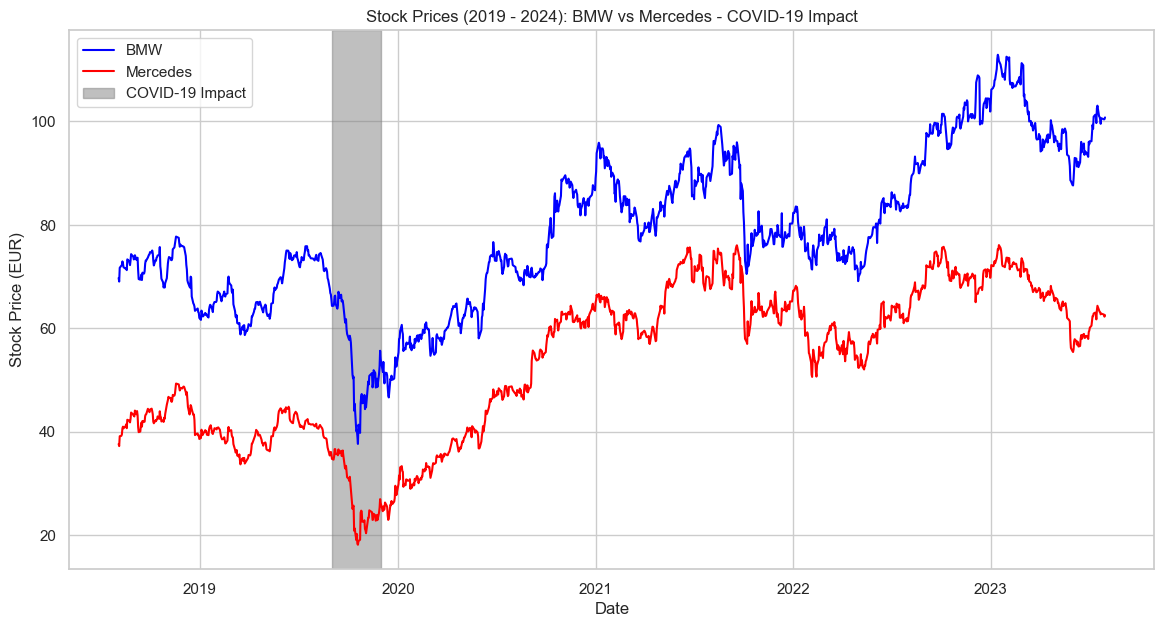

In [49]:
# Filter data to focus on the period around COVID-19 (2019-2024)
bmw_covid = bmw['2019-01-01':'2024-12-31']
mercedes_covid = mercedes['2019-01-01':'2024-12-31']

# Find the highest pre-COVID price (January 2020)
bmw_pre_covid = bmw_covid['2020-01-01':'2020-01-31']['Close'].max()
mercedes_pre_covid = mercedes_covid['2020-01-01':'2020-01-31']['Close'].max()

# Find the lowest price during the COVID-19 period (March 2020)
bmw_covid_drop = bmw_covid['2020-02-01':'2020-04-30']['Close'].min()
mercedes_covid_drop = mercedes_covid['2020-02-01':'2020-04-30']['Close'].min()

# Calculate the percentage drop for both BMW and Mercedes
bmw_drop_percentage = ((bmw_pre_covid - bmw_covid_drop) / bmw_pre_covid) * 100
mercedes_drop_percentage = ((mercedes_pre_covid - mercedes_covid_drop) / mercedes_pre_covid) * 100

# Print out the percentage drops
print(f"BMW's stock dropped by {bmw_drop_percentage.item():.2f}% during the COVID-19 period.")
print(f"Mercedes' stock dropped by {mercedes_drop_percentage.item():.2f}% during the COVID-19 period.")

# Plot the closing prices of BMW and Mercedes during COVID-19 period
plt.figure(figsize=(14, 7))
plt.plot(bmw_covid['Close'], label='BMW', color='blue')
plt.plot(mercedes_covid['Close'], label='Mercedes', color='red')

# Highlight the dip and recovery due to COVID-19
plt.axvspan('2020-02-01', '2020-05-01', color='gray', alpha=0.5, label='COVID-19 Impact')

# Set the title, labels, and x-axis tick formatting
plt.title("Stock Prices (2019 - 2024): BMW vs Mercedes - COVID-19 Impact")
plt.xlabel("Date")
plt.ylabel("Stock Price (EUR)")

# Format x-axis to display every 6 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Display the legend
plt.legend()

# Show the plot
plt.show()


## Seasonal Trends

Seasonal trends reveal cyclical stock price patterns. Below, we compare trends for the entire dataset and the last 5 years.

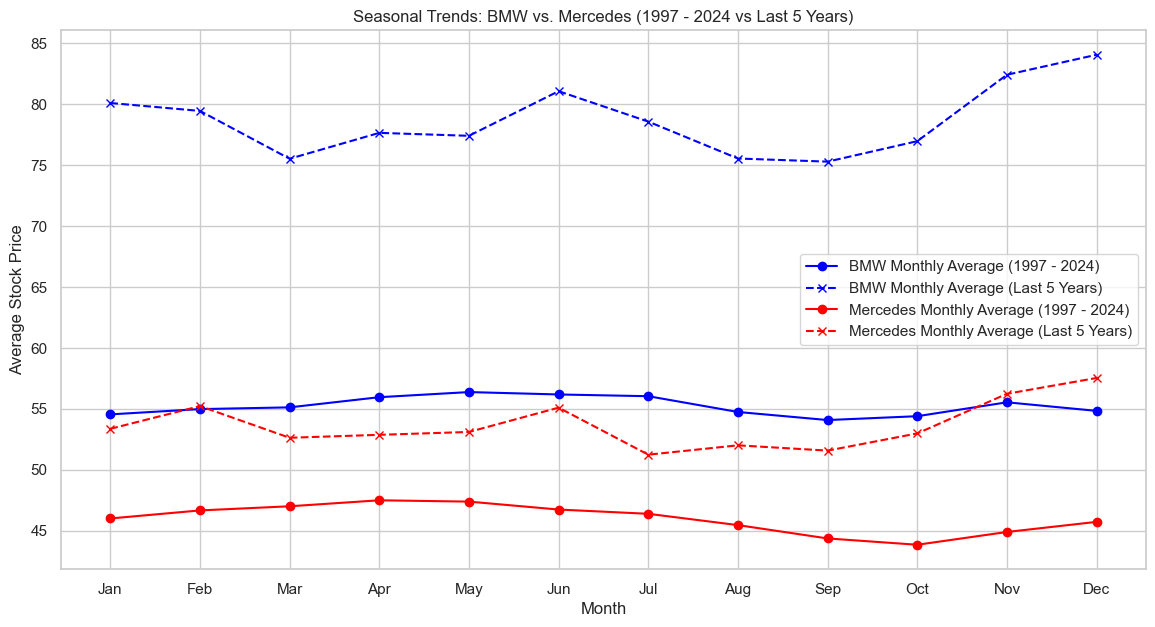

In [50]:
# Filter data for the last 5 years (2019-2024)
bmw_last_5_years = bmw['2019-01-01':'2024-12-31']
mercedes_last_5_years = mercedes['2019-01-01':'2024-12-31']

# Add a 'Month' column for the full dataset
bmw['Month'] = bmw.index.month
mercedes['Month'] = mercedes.index.month

# Calculate monthly averages for the full dataset
bmw_monthly_avg_full = bmw.groupby('Month')['Close'].mean()
mercedes_monthly_avg_full = mercedes.groupby('Month')['Close'].mean()

# Add a 'Month' column for the last 5 years
bmw_last_5_years['Month'] = bmw_last_5_years.index.month
mercedes_last_5_years['Month'] = mercedes_last_5_years.index.month

# Calculate monthly averages for the last 5 years
bmw_monthly_avg_5_years = bmw_last_5_years.groupby('Month')['Close'].mean()
mercedes_monthly_avg_5_years = mercedes_last_5_years.groupby('Month')['Close'].mean()

# Plot seasonal trends for both the full dataset and the last 5 years
plt.figure(figsize=(14, 7))

# Plot for BMW
plt.plot(bmw_monthly_avg_full, label='BMW Monthly Average (1997 - 2024)', color='blue', linestyle='-', marker='o')
plt.plot(bmw_monthly_avg_5_years, label='BMW Monthly Average (Last 5 Years)', color='blue', linestyle='--', marker='x')

# Plot for Mercedes
plt.plot(mercedes_monthly_avg_full, label='Mercedes Monthly Average (1997 - 2024)', color='red', linestyle='-', marker='o')
plt.plot(mercedes_monthly_avg_5_years, label='Mercedes Monthly Average (Last 5 Years)', color='red', linestyle='--', marker='x')

# Add title and labels
plt.title("Seasonal Trends: BMW vs. Mercedes (1997 - 2024 vs Last 5 Years)")
plt.xlabel("Month")
plt.ylabel("Average Stock Price")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add legend
plt.legend()

# Show the plot
plt.show()


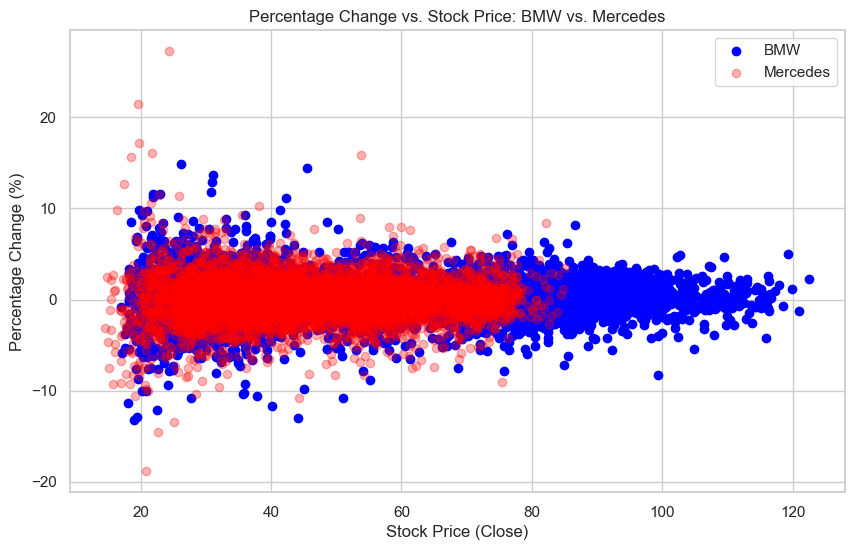

In [51]:
bmw['Price Change (%)'] = bmw['Close'].pct_change() * 100
mercedes['Price Change (%)'] = mercedes['Close'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.scatter(bmw['Close'], bmw['Price Change (%)'], color='blue', label='BMW')
plt.scatter(mercedes['Close'], mercedes['Price Change (%)'], color='red', alpha=0.3, label='Mercedes')
plt.title("Percentage Change vs. Stock Price: BMW vs. Mercedes")
plt.xlabel("Stock Price (Close)")
plt.ylabel("Percentage Change (%)")
plt.legend()
plt.show()

# This scatterplot shows the relationship between the stock price and its percentage change.
# It can highlight periods of sharp price fluctuations and help you see if there are times when small changes in price led to larger percentage changes.

# Manual modeling (SARIMAX)

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
import warnings
import pickle

[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=413.526, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=315.735, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=411.584, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=337.710, Time=0.01 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=315.200, Time=0.27 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=315.957, Time=0.34 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=315.499, Time=0.35 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=350.157, Time=0.37 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=315.672, Time=0.43 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=313.212, T

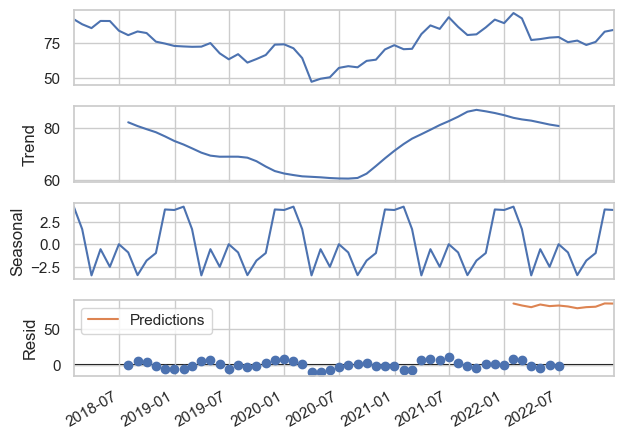

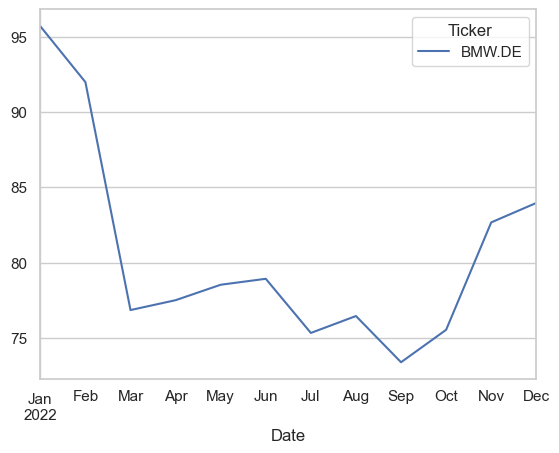

In [21]:
# Disable warnings
warnings.filterwarnings("ignore")

# Load data from yfinance
data = yf.download('BMW.DE', start='2018-01-01', end='2023-01-01')
data = data[["Close"]].dropna()  # Keep only the 'Close' column and remove missing values

data.to_csv("Datasets/bmw_stock_data_2018_2023.csv")

# Resample data to monthly frequency (sum is not appropriate for stock prices, so we use mean)
data_monthly = data.resample('M').mean()

# Decompose the time series data
result = seasonal_decompose(data_monthly['Close'], model='additive')
result.plot()

# Auto ARIMA for model selection
stepwise_fit = auto_arima(data_monthly['Close'], 
                          start_p=1, start_q=1, 
                          max_p=3, max_q=3, 
                          m=12, start_P=0, 
                          seasonal=True, 
                          d=None, D=1, trace=True, 
                          error_action='ignore', 
                          suppress_warnings=True, 
                          stepwise=True)

# Print summary of the best model
print(stepwise_fit.summary())

# Split data into train and test sets (one year for testing)
train = data_monthly.iloc[:len(data_monthly)-12]
test = data_monthly.iloc[len(data_monthly)-12:]

# Fit the SARIMAX model using the best parameters from Auto ARIMA
model = SARIMAX(train['Close'], 
                order=(1, 0, 0), 
                seasonal_order=(0, 1, 1, 12))

result = model.fit()
print(result.summary())

# Write the model of BMW away in a pickle file
with open('Models/bmw_stockprice_arima_model.pkl', 'wb') as pkl_file:
    pickle.dump(result, pkl_file)

# Make predictions for the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start, end, typ='levels').rename("Predictions")

# Plot predictions and actual values
predictions.plot(legend=True)
test['Close'].plot(legend=True)

# Evaluate the model
print("Root Mean Squared Error:", rmse(test["Close"], predictions))
print("Mean Squared Error:", mean_squared_error(test["Close"], predictions))

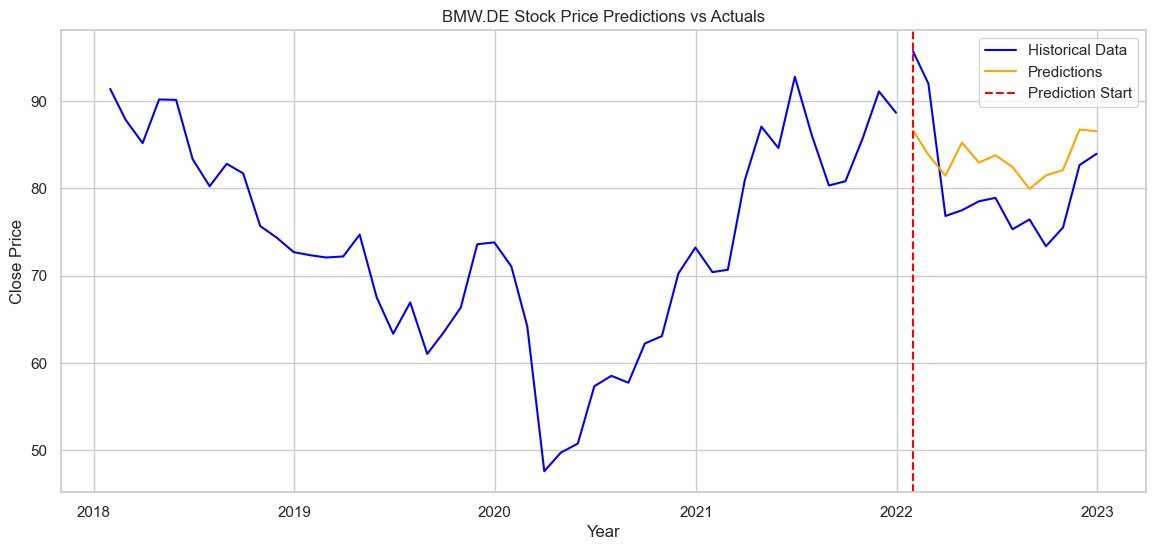

In [17]:
# Make predictions for the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start=start, end=end, typ='levels').rename("Predictions")

# Ensure predictions and test data have matching indices
predictions.index = test.index

# Plot predictions and actual values
sns.set_style('whitegrid')

plt.figure(figsize=(14, 6))
plt.plot(train.index, train['Close'], label='Historical Data', color='blue')
plt.plot(test.index, test['Close'], color='blue')
plt.plot(predictions.index, predictions, label='Predictions', color='orange')
plt.axvline(x=test.index[0], color='red', linestyle='--', label='Prediction Start')
plt.legend(loc='best')
plt.title("BMW.DE Stock Price Predictions vs Actuals")
plt.ylabel("Close Price")
plt.xlabel("Year")
plt.show()

In [22]:
with open('Models/bmw_stockprice_arima_model.pkl', 'rb') as pkl_file:
    bmw_model = pickle.load(pkl_file)

In [23]:
# Fetch Mercedes stock data
data_mercedes = yf.download('MBG.DE', start='2018-01-01', end='2023-01-01')
data_mercedes = data_mercedes[["Close"]].dropna()

# Resample data to monthly frequency
data_mercedes_monthly = data_mercedes.resample('M').mean()

# Split data into train and test sets (last 12 months for testing)
train_mercedes = data_mercedes_monthly.iloc[:-12]
test_mercedes = data_mercedes_monthly.iloc[-12:]


[*********************100%***********************]  1 of 1 completed


In [24]:
# Use the BMW model to predict Mercedes prices
start = len(train_mercedes)
end = len(train_mercedes) + len(test_mercedes) - 1

# Generate predictions
predictions_mercedes = bmw_model.predict(start=start, end=end, typ='levels').rename("Predictions")

# Align predictions with test index
predictions_mercedes.index = test_mercedes.index


## Trying the ARIMA model (BMW) to predict the Mercedes stockprice

As you can see the Arima model of BMW predicts a very different close price then the actual mercedes close price. Although the prediction isn't that bad we recommend creating a seperate model for predicting the mercedes stock prices. The reason behind this is dat mercedes has a lower closing price then BMW. That's why model is predicting a higher closing time in the near future.

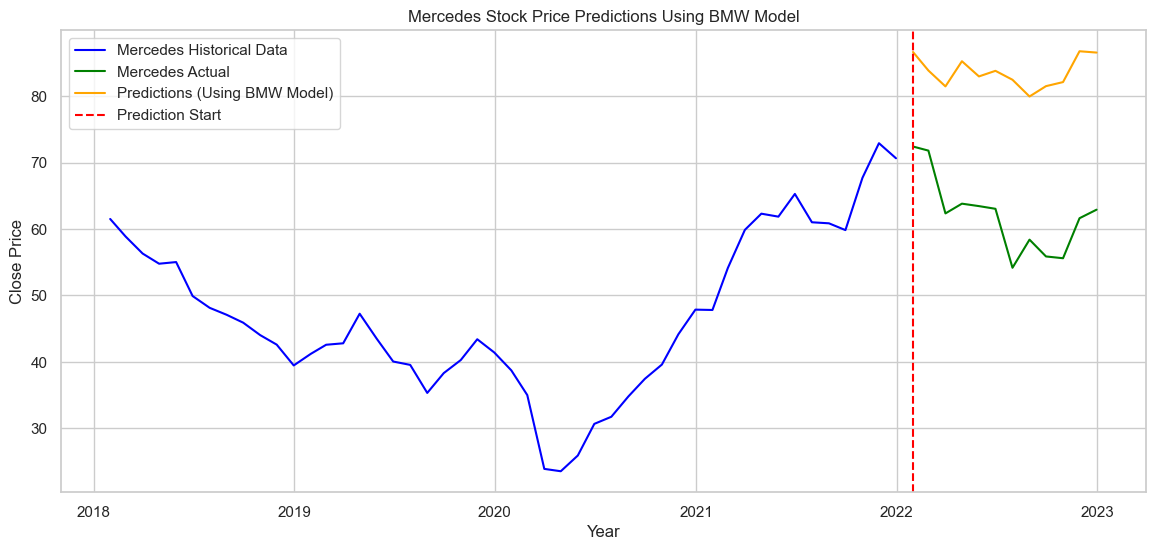

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot predictions and actual values
sns.set_style('whitegrid')

plt.figure(figsize=(14, 6))
plt.plot(train_mercedes.index, train_mercedes['Close'], label='Mercedes Historical Data', color='blue')
plt.plot(test_mercedes.index, test_mercedes['Close'], color='green', label='Mercedes Actual')
plt.plot(predictions_mercedes.index, predictions_mercedes, label='Predictions (Using BMW Model)', color='orange')
plt.axvline(x=test_mercedes.index[0], color='red', linestyle='--', label='Prediction Start')
plt.legend(loc='best')
plt.title("Mercedes Stock Price Predictions Using BMW Model")
plt.ylabel("Close Price")
plt.xlabel("Year")
plt.show()


# PyCaret Modeling

In [16]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from pycaret.time_series import *

ModuleNotFoundError: No module named '_plotly_utils'

## Data Collection

Like previous we use we use the yfinance library to download BMW stock data from 2018 to 2023. This data provides the historical closing prices, which will be the foundation for our forecasting pycaret model.

In [ ]:
# Download BMW stock data from Yahoo Finance
bmw_data = yf.download("BMW.DE", start="2018-01-01", end="2023-01-01")
bmw_data = bmw_data.dropna()

bmw_data= bmw_data[['Close']]
bmw_data.reset_index(level=0, inplace=True)
bmw_data['Date'] = pd.to_datetime(bmw_data['Date'])
bmw_data


## Preparing the BMW Stock Data

To ready our BMW stock data for time series analysis, we begin by converting the Date column into a consistent datetime format. This ensures smooth handling of time-based data.

Next, we group the data by date to eliminate duplicates and set a daily frequency, creating a seamless timeline. Any missing values, often due to non-trading days, are filled forward to maintain continuity.

This clean and complete dataset is now perfectly structured for forecasting and analysis

In [ ]:
bmw_data['Date']=bmw_data['Date'].astype(str)
bmw_data['Date'] = pd.to_datetime(bmw_data['Date'])
bmw_data = bmw_data.groupby('Date').sum()
bmw_data = bmw_data.asfreq(freq ='D')
bmw_data['Close'] = bmw_data['Close'].ffill()
bmw_data

## Setting Up PyCaret for Time Series Forecasting

With our data cleaned and prepared, the next step is to leverage PyCaret's powerful time series forecasting capabilities.

- fh=7: Setting a forecasting horizon of 7 days to predict the upcoming week.
- fold=3: Performing 3-fold cross-validation to ensure robust model evaluation.
- session_id=123: Setting a random seed for reproducibility, so results remain consistent across runs.

In [ ]:
from pycaret.time_series import *
setup(bmw_data, fh = 7, fold = 3, session_id = 123)



## Identifying the Best Forecasting Model (Elastic Net)

Once the setup is complete, the next step is to find the most accurate forecasting model.

Using the compare_models() function, PyCaret evaluates a wide range of time series models against our BMW stock price data. By sorting the results based on Mean Absolute Error (MAE), we ensure the selection prioritizes models that minimize prediction errors.

Here, we specify n_select=1, instructing PyCaret to identify and return only the single best-performing model. This model will serve as the foundation for our 7-day forecasts.

In [ ]:
best = compare_models(sort = 'MAE', n_select=1)

In [ ]:
import pickle

with open('best_bmw_model_pycaret.pkl', 'wb') as file: 
    pickle.dump(best, file)


## Forecasting 

This forecast serves as a valuable tool for investors and analysts to make informed decisions. However, it's crucial to remember that the stock market is inherently unpredictable. By continuously monitoring market dynamics and refining our models, we can strive to improve the accuracy of future forecasts.

In [ ]:
import matplotlib.pyplot as plt
# Load your existing best model
with open('best_bmw_model_pycaret.pkl', 'rb') as file: 
    best_model = pickle.load(file)

# Forecast for the next 90 days
forecast = predict_model(best_model, fh=240)

# Create a plot for the forecast
plt.figure(figsize=(12, 6))
plt.plot(bmw_data.index, bmw_data['Close'], label="BMW Close", color="blue")
plt.plot(forecast.index, forecast['y_pred'], label="240-Day Forecast (Elastic NET)", color="orange")
plt.xlabel("Date")
plt.ylabel("BMW Close Price")
plt.title("240-Day Forecast for BMW Stock Prices")
plt.legend()
plt.grid()
plt.show()

# Conclusion

This analysis highlights stock price patterns, the impact of major events like COVID-19, and the power of predictive modeling for financial insights.

By leveraging PyCaret's Elastic Net model, we have successfully predicted BMW's stock prices. This journey highlights the power of machine learning in financial analysis, providing us with tools to make informed decisions based on data-driven insights.